# ASSIGNMENT 1

# Assignment Data Visualization, EDA and Statistics

### Exploratory data analysis on COVID-19 across the globe. 

Problem is divided into 3 sections. 
- Data Understaing, 
- EDA and Visualization 
- Statistics.

Name:Hemanth HM <br>
Email:hemanthhm222@gmail.com 

Please pledge for honour code.
 
 
 <b> I, Hemanth HM, promise that during the course of this assignment I shall not use unethical and nefarious means in an attempt to defraud the sanctity of the assignment and gain an unfair advantage. I will adhere to the virtues of truth and honesty. I will honour the SURE Trust honour code. </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
data = pd.read_csv('covid_19.csv')

## Data Understanding

In [4]:
#1 properties of data. shape, columns

In [5]:
data.shape

(49068, 10)

In [6]:
data.columns.tolist()

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 'Date',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'WHO Region']

In [7]:
data.shape

(49068, 10)

In [8]:
#2 data glipse with info and describe

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


###  There are 9 columns in which 6 are numerical columns  and 4 are categorical columns

In [10]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [11]:
#(Optional step) Data cleaning if required.

In [12]:
data.isnull().mean()*100

Province/State    70.114943
Country/Region     0.000000
Lat                0.000000
Long               0.000000
Date               0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
Active             0.000000
WHO Region         0.000000
dtype: float64

In [13]:
data.drop('Province/State',inplace=True,axis=1)

In [14]:
#3 which country had highest covid DEATHS in january 2020.

In [15]:
data[['Year','Month','Date']] = data['Date'].str.split('-',expand=True)

In [16]:
data['Year'].value_counts()

2020    49068
Name: Year, dtype: int64

In [17]:
data.drop('Year',inplace=True,axis=1)

In [18]:
data[data['Month']=='01'].pivot_table(index=['Country/Region'],values=['Deaths'],aggfunc='count').sort_values(by='Deaths',ascending=False)[:5]

,Deaths
Country/Region,
China,330
Canada,120
France,110
United Kingdom,110
Australia,80


<AxesSubplot:xlabel='Country/Region'>

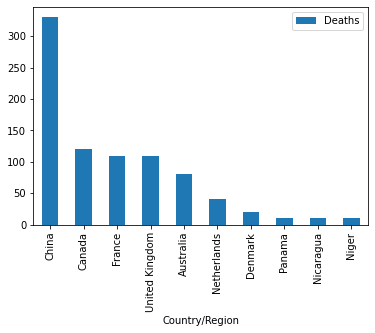

In [19]:
data[data['Month']=='01'].pivot_table(index=['Country/Region'],values=['Deaths'],aggfunc='count').sort_values(by='Deaths',ascending=False)[:10].plot(kind='bar')

## China has highest  covid cases which is 330 cases in january 2020 

In [20]:
#5 print top 5 countries with highest CONFIRMED covid cases. Print month wise.

In [21]:
dict ={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'}
for i in range(1,8):
    print(dict[i],'Month')
    print(data[data['Month']=='0'+str(i)].pivot_table(index=['Country/Region'],values=['Confirmed'],aggfunc='count').sort_values(by=['Confirmed'],ascending=False)[:5])
    print('-------------------------')

January Month
                Confirmed
Country/Region           
China                 330
Canada                120
France                110
United Kingdom        110
Australia              80
-------------------------
February Month
                Confirmed
Country/Region           
China                 957
Canada                348
France                319
United Kingdom        319
Australia             232
-------------------------
March Month
                Confirmed
Country/Region           
China                1023
Canada                372
France                341
United Kingdom        341
Australia             248
-------------------------
April Month
                Confirmed
Country/Region           
China                 990
Canada                360
France                330
United Kingdom        330
Australia             240
-------------------------
May Month
                Confirmed
Country/Region           
China                1023
Canada                372
F

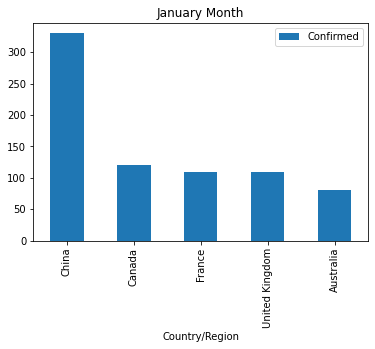

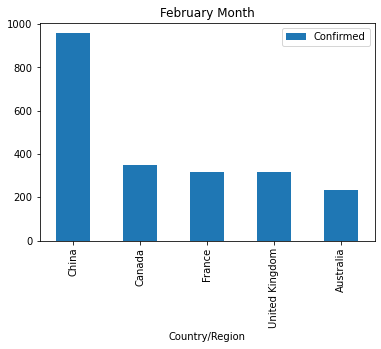

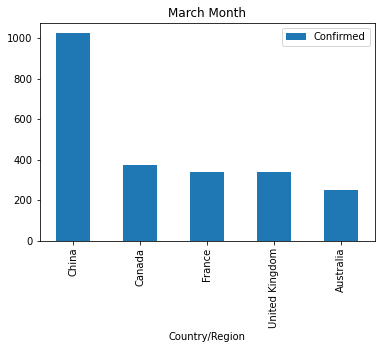

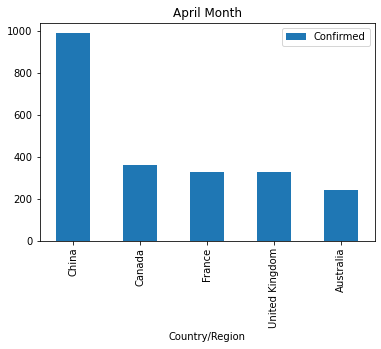

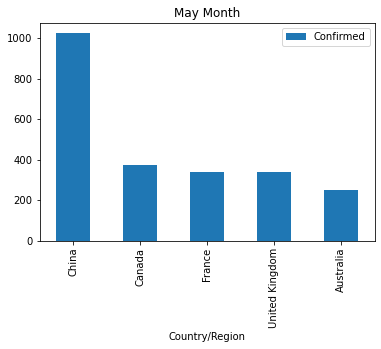

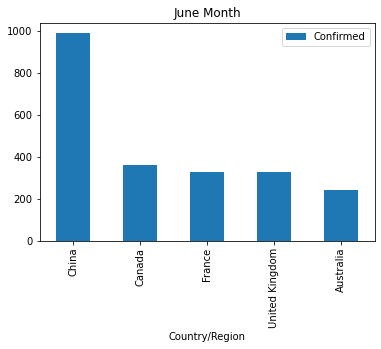

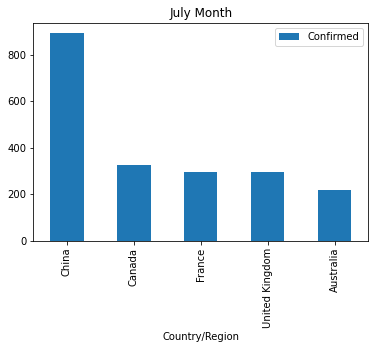

In [22]:
dict ={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'}
for i in range(1,8):    
    data[data['Month']=='0'+str(i)].pivot_table(index=['Country/Region'],values=['Confirmed'],aggfunc='count').sort_values(by=['Confirmed'],ascending=False)[:5].plot(kind='bar')
    plt.title(dict[i]+' Month')
    plt.show()

In [23]:
#6 top 3 countries with highest DEATH covid cases print month wise.

In [24]:
dict ={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'}
for i in range(1,8):
    print(dict[i],'Month')
    print(data[data['Month']=='0'+str(i)].pivot_table(index=['Country/Region'],values=['Deaths'],aggfunc='count').sort_values(by=['Deaths'],ascending=False)[:3])
    print('-------------------------')

January Month
                Deaths
Country/Region        
China              330
Canada             120
France             110
-------------------------
February Month
                Deaths
Country/Region        
China              957
Canada             348
France             319
-------------------------
March Month
                Deaths
Country/Region        
China             1023
Canada             372
France             341
-------------------------
April Month
                Deaths
Country/Region        
China              990
Canada             360
France             330
-------------------------
May Month
                Deaths
Country/Region        
China             1023
Canada             372
France             341
-------------------------
June Month
                Deaths
Country/Region        
China              990
Canada             360
France             330
-------------------------
July Month
                Deaths
Country/Region        
China              891


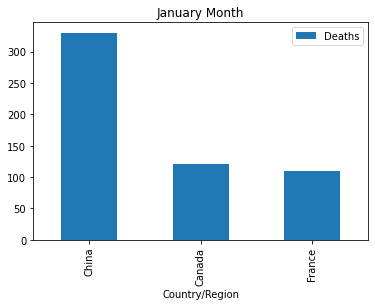

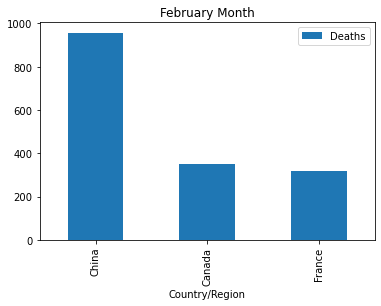

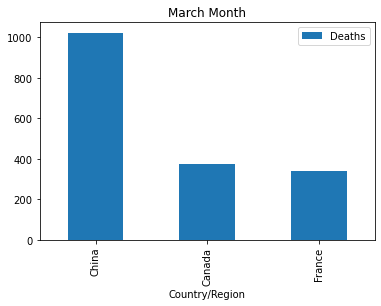

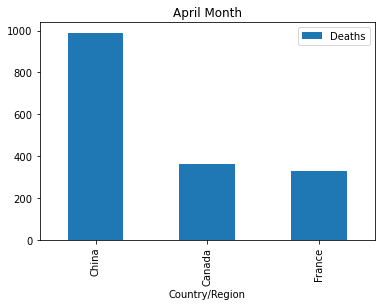

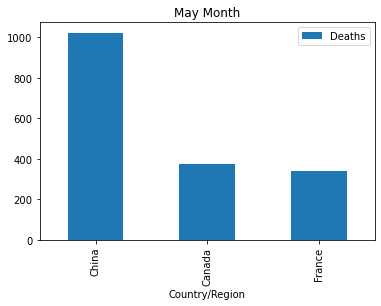

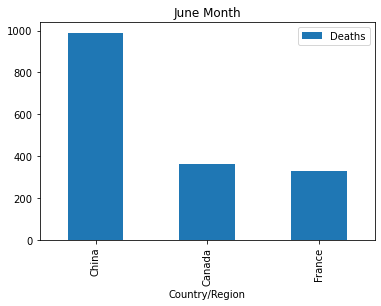

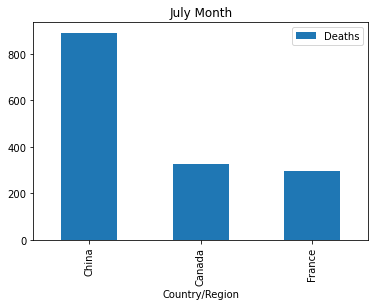

In [25]:
dict ={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'}
for i in range(1,8):    
    data[data['Month']=='0'+str(i)].pivot_table(index=['Country/Region'],values=['Deaths'],aggfunc='count').sort_values(by=['Deaths'],ascending=False)[:3].plot(kind='bar')
    plt.title(dict[i]+' Month')
    plt.show()

In [26]:
#7 print countries which are amongst top 10 with highest CONFIRMED cases 
# for 3 months consecutively. 

In [27]:
x=0
for i in range(1,8):
    if data[(data['Month']=='0'+str(i)) | (data['Month']=='0'+str(i+1)) | (data['Month']=='0'+str(i+2))].pivot_table(index=['Country/Region'],values=['Deaths'],aggfunc='count').sort_values(by=['Deaths'],ascending=False).iloc[:10].sum()[0] > x:
        data_confirmed = data[(data['Month']=='0'+str(i)) | (data['Month']=='0'+str(i+1)) | (data['Month']=='0'+str(i+2))].pivot_table(index=['Country/Region'],values=['Deaths'],aggfunc='count').sort_values(by=['Deaths'],ascending=False).iloc[:10]
        x = data[(data['Month']=='0'+str(i)) | (data['Month']=='0'+str(i+1)) | (data['Month']=='0'+str(i+2))].pivot_table(index=['Country/Region'],values=['Deaths'],aggfunc='count').sort_values(by=['Deaths'],ascending=False).iloc[:10].sum()[0]

In [28]:
data_confirmed.index.tolist()

['China',
 'Canada',
 'France',
 'United Kingdom',
 'Australia',
 'Netherlands',
 'Denmark',
 'Panama',
 'Nicaragua',
 'Niger']

## The above are top 10 contries with highest confirmed cases for 3 months consecutively

In [29]:
#8 how many total CONFIRMED cases in Asia as per dataset

In [30]:
data['WHO Region'] = np.where((data['WHO Region']=='South-East Asia') | (data['WHO Region']=='Western Pacific' ),'Asia',data['WHO Region'])

In [31]:
data[data['WHO Region']=='Asia']['Confirmed'].sum()

81492776

## There are total 8,14,92,776 cases in asia

In [32]:
#9 Which WHO region have highest DEATHS?

In [33]:
data.pivot_table(index=['WHO Region'],values=['Deaths'],aggfunc='count')

,Deaths
WHO Region,
Africa,9024
Americas,8648
Asia,12220
Eastern Mediterranean,4136
Europe,15040


<AxesSubplot:xlabel='WHO Region'>

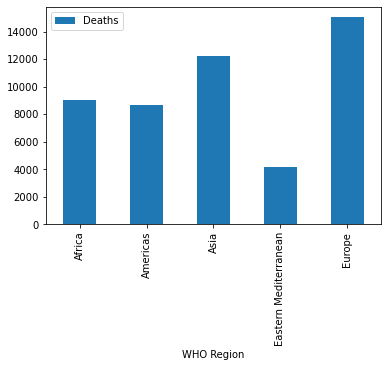

In [34]:
data.pivot_table(index=['WHO Region'],values=['Deaths'],aggfunc='count').plot(kind='bar')

## Europe region has highest deaths 

In [35]:
#10 print top 10 contries with LOWEST CONFIRMED:DEATH ratio print month wise.

In [36]:
data = data[data['Confirmed'] > 0 ]

In [37]:
data['Death_ratio'] = data['Deaths']/data['Confirmed']

In [38]:
for i in range(1,8):
    print(dict[i],'Month')
    print(data[data['Month']=='0'+str(i)].pivot_table(index=['Country/Region'],values=['Death_ratio'])[:10])
    print()

January Month
                Death_ratio
Country/Region             
Australia          0.000000
Cambodia           0.000000
Canada             0.000000
China              0.010243
Finland            0.000000
France             0.000000
Germany            0.000000
India              0.000000
Italy              0.000000
Japan              0.000000

February Month
                Death_ratio
Country/Region             
Afghanistan             0.0
Algeria                 0.0
Australia               0.0
Austria                 0.0
Bahrain                 0.0
Belarus                 0.0
Belgium                 0.0
Brazil                  0.0
Cambodia                0.0
Canada                  0.0

March Month
                     Death_ratio
Country/Region                  
Afghanistan             0.009111
Albania                 0.034234
Algeria                 0.049340
Andorra                 0.004455
Angola                  0.071429
Antigua and Barbuda     0.000000
Argentina            

In [39]:
#11 print India's CONFIRMED:RECOVERED cases ratio in the month of March

In [40]:
data['Recoverd_ratio'] = data['Recovered']/data['Confirmed']

In [41]:
data[(data['Country/Region']=='India') & (data['Month']=='03')]['Recoverd_ratio'].mean()

0.14236159769593784

## On an average , India's confirmed:recoverd rate in the month of march is 14.23 % 

In [42]:
#12 which month have highest active cases in USA.

In [43]:
data[data['Country/Region']=='US'].pivot_table(index=['Month'],values=['Active'],aggfunc='sum').sort_values(by='Active',ascending=False)

,Active
Month,
07,61226172
06,43981001
05,33958851
04,16769592
03,1045178
02,289
01,38


In [44]:
dict[7]

'July'

## July month has highest active cases in USA

## EDA & Visualization

#### You have to follow the below steps. You can show creativity but document every step

Univariate Analysis
  * Categorical 
      - value count
      - top unique values
      - bar plot
  * Numerical
      - Distribution plot or line plot
      - statistical info about column ( 3m, Std dev)
      - find type of distribution
    
Bivarite Analysis
  * Numerical -  Numerical
      - Pairplot for all the numeric variables
      - heatmap of correlations
  * Categorcal - categorical
      - value_counts comparsion
  * categorical - numerical
      - category wise sum,mean
      - timeline + numerical line plot
      
Moving averages
  * create new columns for numerical data with moving averages. plot a line graph against timeline, Moving averages will tell you the upcoming trend. use df.window(size=x) look for documentation on pandas official site page

In [45]:
# create as many cells as required to do EDA and visulization. show your creativity.

In [46]:
cat_cols = [i for i in data.columns.tolist() if data[i].dtype=='O']
num_cols = [i for i in data.columns.tolist() if data[i].dtype!='O']

## Univariate categorical

------- Country/Region ------

China             6185
Canada            1726
France            1552
United Kingdom    1476
Australia         1304
Netherlands        555
Denmark            298
US                 188
Taiwan*            188
South Korea        188
Name: Country/Region, dtype: int64
 
 Total unique values is  187


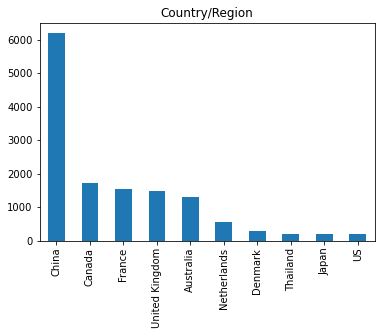

------- Date ------

27    1421
26    1413
25    1401
24    1390
23    1381
22    1371
21    1337
20    1333
19    1324
18    1317
Name: Date, dtype: int64
 
 Total unique values is  31


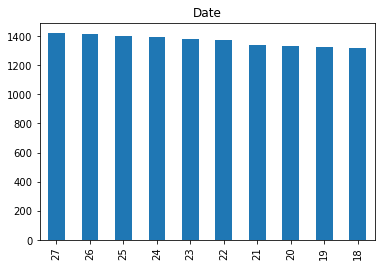

------- WHO Region ------

Europe                   11657
Asia                     11357
Americas                  6483
Africa                    6269
Eastern Mediterranean     3243
Name: WHO Region, dtype: int64
 
 Total unique values is  5


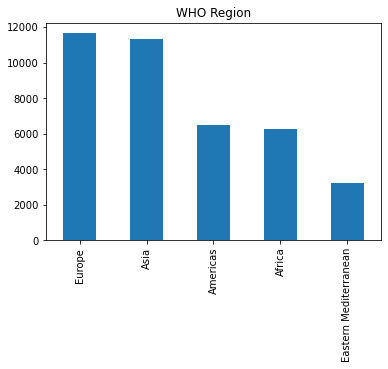

------- Month ------

05    8079
06    7830
04    7712
07    7047
03    5929
02    1957
01     455
Name: Month, dtype: int64
 
 Total unique values is  7


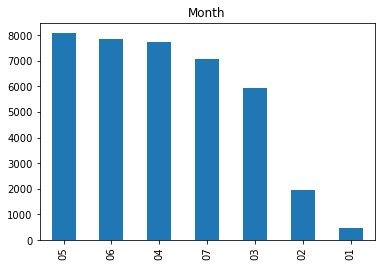

In [47]:
'''for i in cat_cols:
    print('-------',i,'------')
    print('')
    print(data[i].value_counts().sort_values(ascending=False)[:10])
    print(' ')
    print(' Total unique values is ',data[i].nunique())
    data[i].value_counts()[:10].plot(kind='bar')
    plt.title(i)
    plt.show()'''


## Univaraite numerical

------ Lat -------
mean =  22.473756572944517
median =  25.025885
mode =  52.9399
standard deviation =  24.65944575631651


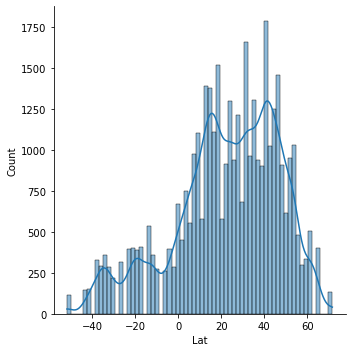

------ Long -------
mean =  28.75302534322714
median =  24.9668
mode =  -100.0
standard deviation =  71.41951506339163


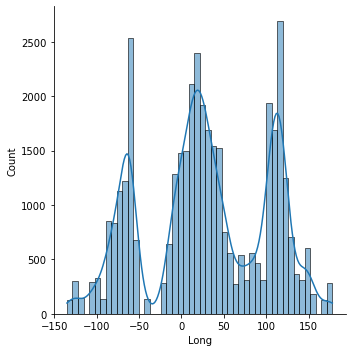

------ Confirmed -------
mean =  21238.905944781975
median =  446.0
mode =  1
standard deviation =  142449.0792993026


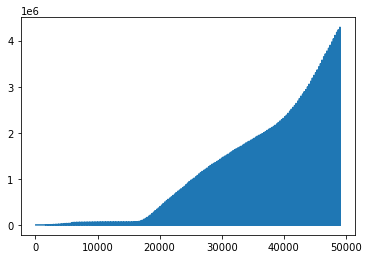

------ Deaths -------
mean =  1112.1767540823912
median =  6.0
mode =  0
standard deviation =  7063.0603151603


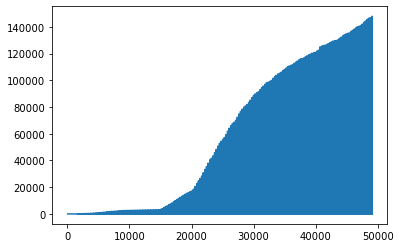

------ Recovered -------
mean =  9956.887615678434
median =  135.0
mode =  0
standard deviation =  61296.30383553037


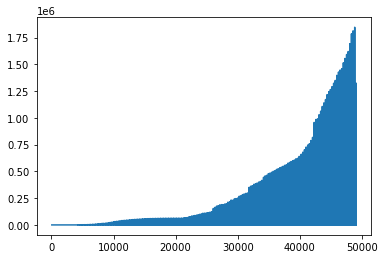

------ Active -------
mean =  10169.84157502115
median =  105.0
mode =  0
standard deviation =  85403.98606984751


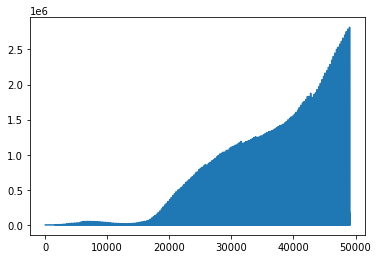

------ Death_ratio -------
mean =  0.027993816164436528
median =  0.0136986301369863
mode =  0.0
standard deviation =  0.043863975213217755


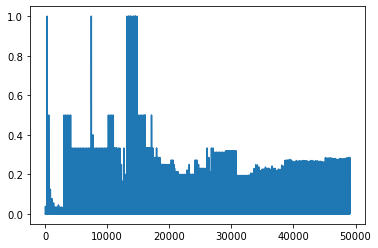

------ Recoverd_ratio -------
mean =  0.4753066993379976
median =  0.4610024650780608
mode =  0.0
standard deviation =  0.37511083297221215


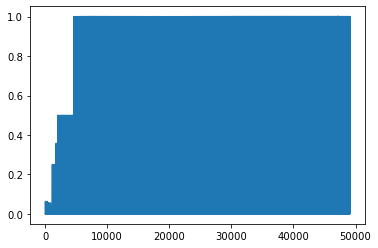

In [49]:
'''for i in num_cols:
    print('------',i,'-------')
    print('mean = ',data[i].mean())
    print('median = ',data[i].median())
    print('mode = ',data[i].mode()[0])
    print('standard deviation = ',data[i].std())
    if data[i].nunique() < 300:
        sns.displot(data[i],kde=True)
        plt.show()
    else:
        plt.plot(data[i])
        plt.show()'''

## Bivariate analysis

## Numerical-numerical

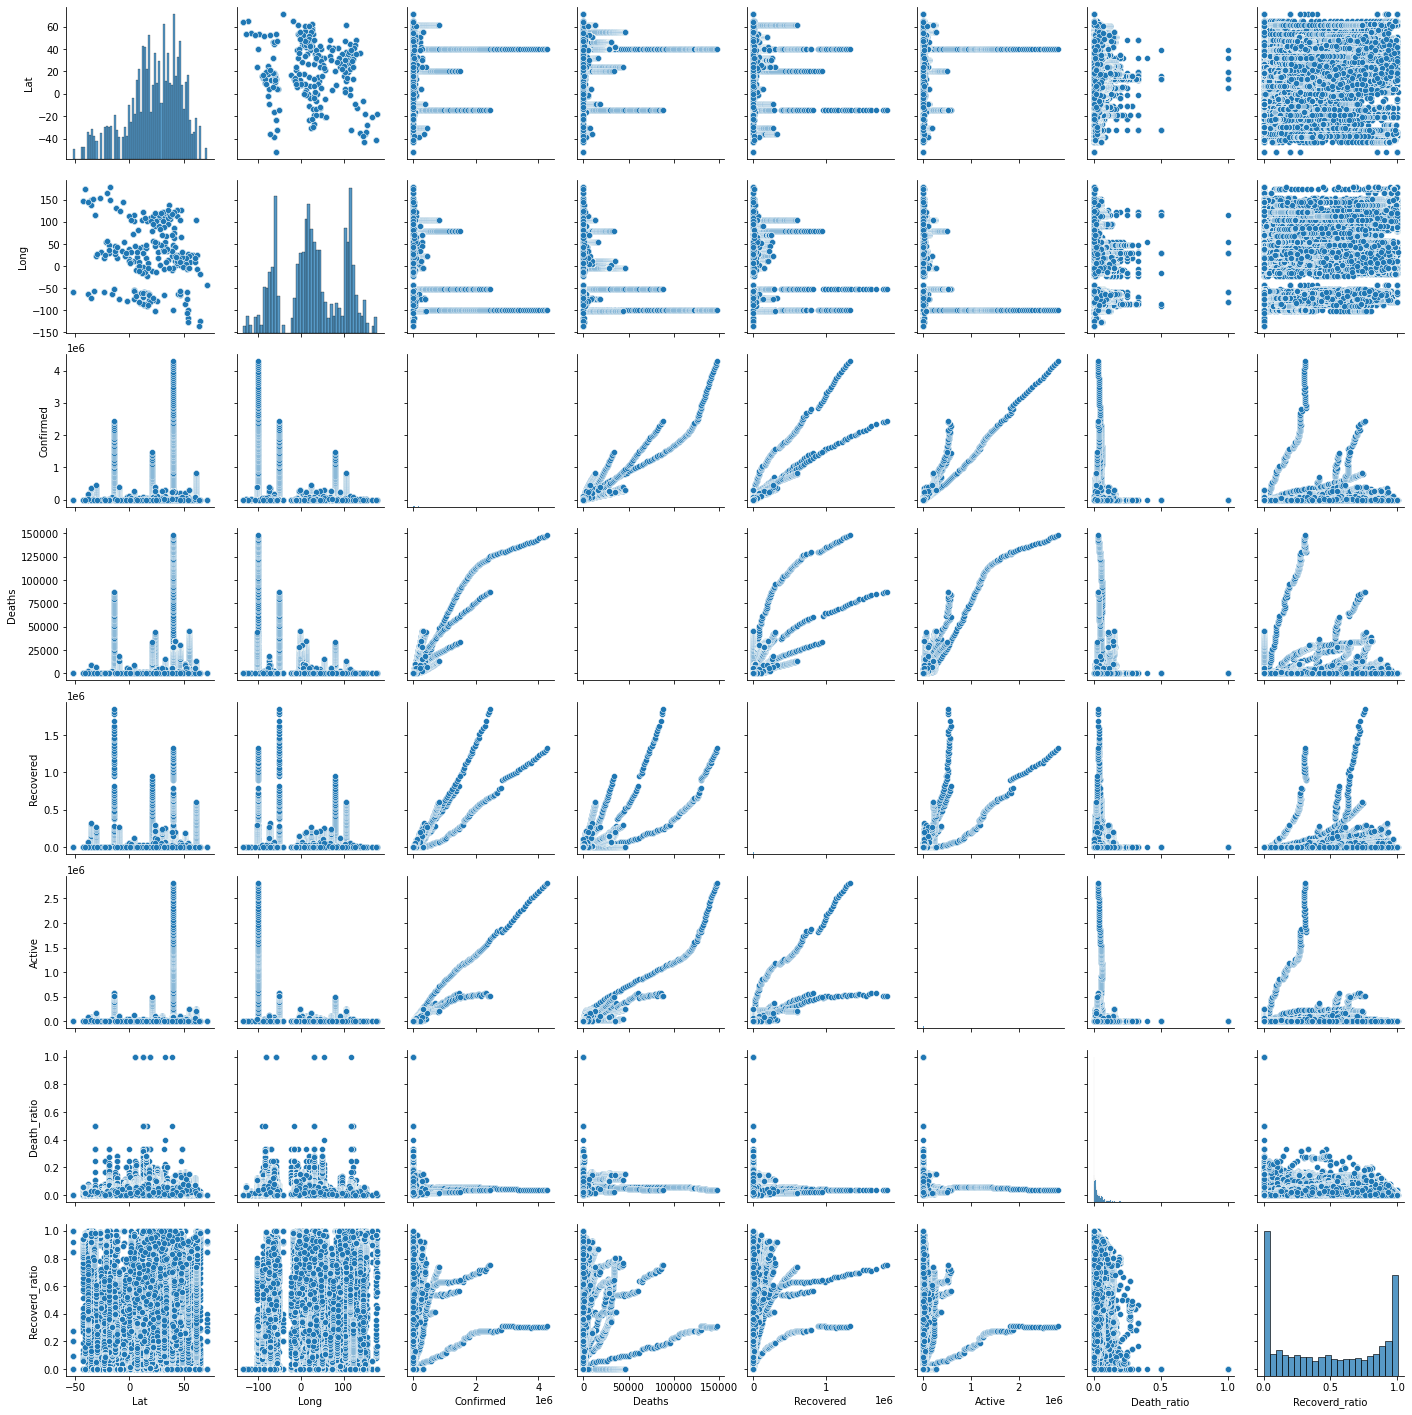

In [50]:
sns.pairplot(data[num_cols])

<AxesSubplot:>

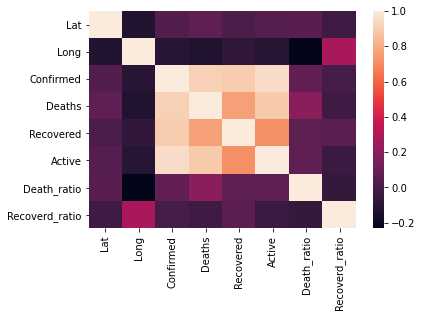

In [51]:
sns.heatmap(data[num_cols].corr())

In [66]:
data[num_cols].corr()

,Lat,Long,Confirmed,Deaths,Recovered,Active,Death_ratio,Recoverd_ratio
Lat,1.000000,-0.120407,0.035413,0.073040,0.010591,0.045426,0.053879,-0.028481
Long,-0.120407,1.000000,-0.098398,-0.123908,-0.069995,-0.103638,-0.232708,0.278826
Confirmed,0.035413,-0.098398,1.000000,0.911946,0.895003,0.950161,0.082843,-0.002585
Deaths,0.073040,-0.123908,0.911946,1.000000,0.761850,0.891577,0.195646,-0.025713
Recovered,0.010591,-0.069995,0.895003,0.761850,1.000000,0.712088,0.067607,0.059027
Active,0.045426,-0.103638,0.950161,0.891577,0.712088,1.000000,0.073474,-0.044549
Death_ratio,0.053879,-0.232708,0.082843,0.195646,0.067607,0.073474,1.000000,-0.059459
Recoverd_ratio,-0.028481,0.278826,-0.002585,-0.025713,0.059027,-0.044549,-0.059459,1.000000


### Confirmed , deaths , recoverd, active columns are corelated as
 

### Active = Confirmed - Deaths - Recoverd 

## Categorical - Categorical 

In [67]:
cat_cols

['Country/Region', 'Date', 'WHO Region', 'Month']

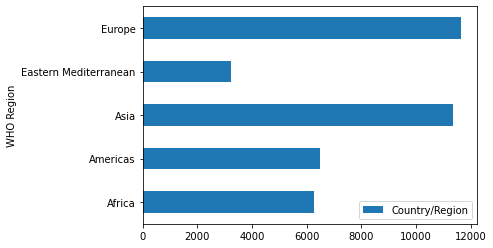

In [92]:
data.groupby('WHO Region')[['Country/Region']].count().plot(kind='barh')
plt.show()

In [96]:
data.groupby('WHO Region')[['Country/Region']].count().sort_values(by='Country/Region',ascending=False)

,Country/Region
WHO Region,
Europe,11657
Asia,11357
Americas,6483
Africa,6269
Eastern Mediterranean,3243


### Europe has highest number of countries in the given dataset

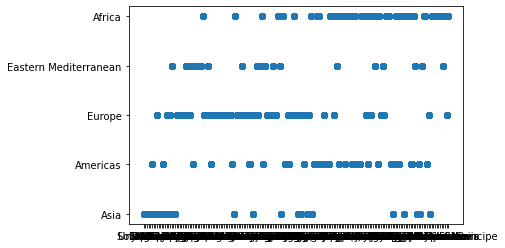

In [94]:
plt.scatter(data['Country/Region'],data['WHO Region'])

<AxesSubplot:xlabel='Month'>

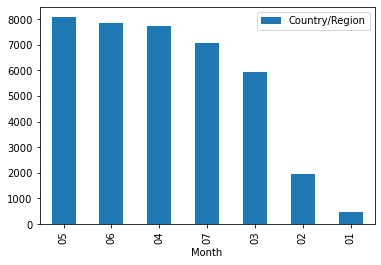

In [80]:
data.groupby('Month')[['Country/Region']].count().sort_values(by='Country/Region',ascending=False)[:10].plot(kind='bar')

### The covid  spread increased  to more number of countries in the month of may and june  

In [105]:
data.pivot_table(index=['Month',"WHO Region"],values=['Country/Region'],aggfunc='count').sort_values(by='Country/Region',ascending=False)[:20]

Country/Region
Month WHO Region                
05    Europe                2480
06    Europe                2400
04    Europe                2364
07    Europe                2160
05    Asia                  2015
06    Asia                  1950
04    Asia                  1950
03    Europe                1910
      Asia                  1851
07    Asia                  1755
05    Africa                1476
06    Africa                1440
05    Americas              1426
02    Asia                  1424
06    Americas              1380
04    Americas              1380
      Africa                1367
07    Africa                1296
      Americas              1242
03    Americas               933

### Europe region was more prone to covid as the number of countries in this region infected by covid was rising steadely

## Categorical - Numerical 

In [68]:
num_cols

['Lat',
 'Long',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Death_ratio',
 'Recoverd_ratio']

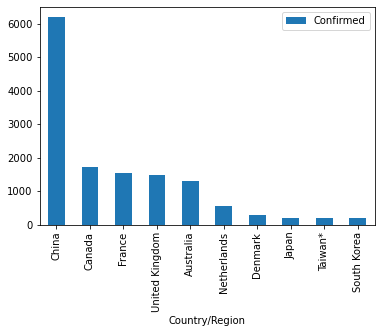

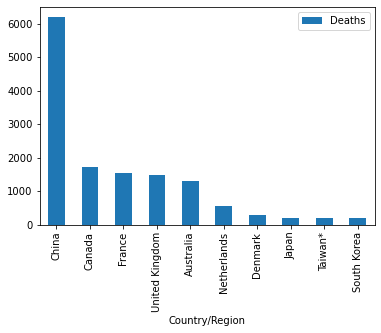

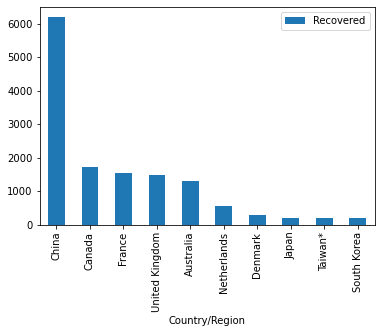

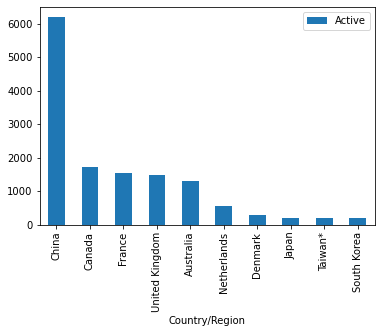

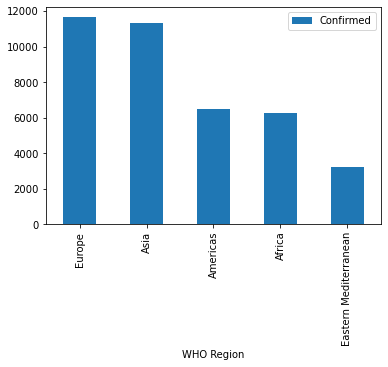

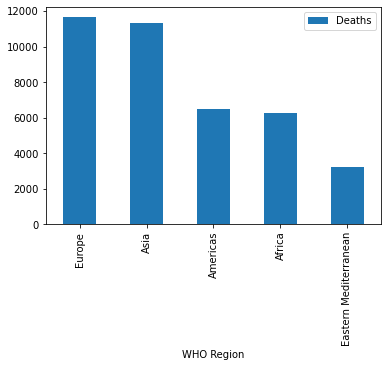

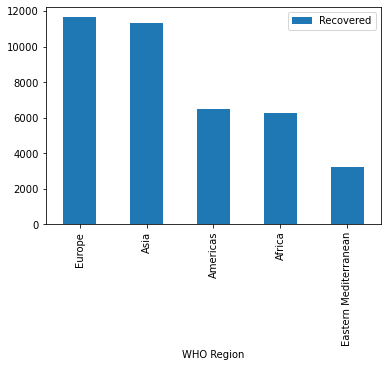

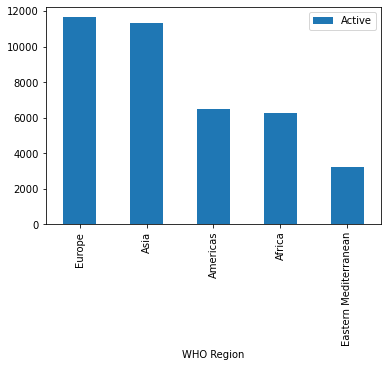

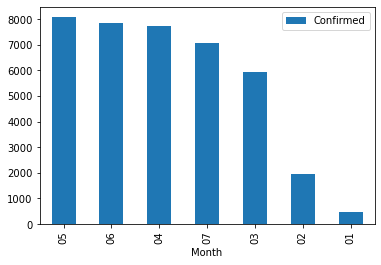

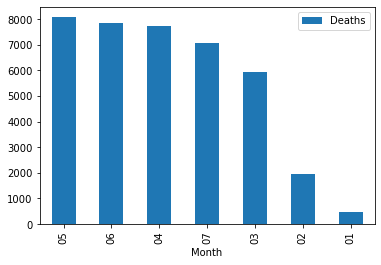

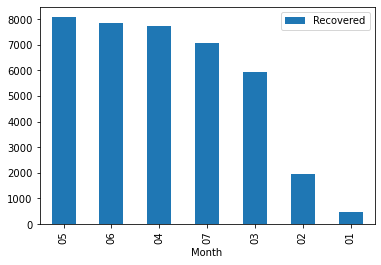

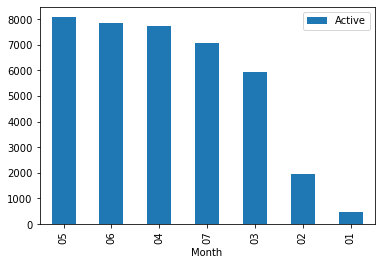

In [72]:
temp = ['Confirmed','Deaths','Recovered','Active']
for i in ['Country/Region','WHO Region','Month']:
    for j in temp:
        data.groupby(i)[[j]].count().sort_values(by=j,ascending=False)[:10].plot(kind='bar')
        plt.show()

### China has highest confirmed cases

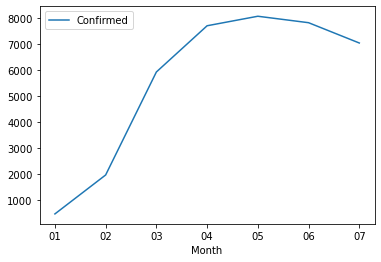

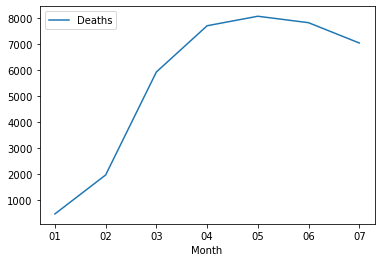

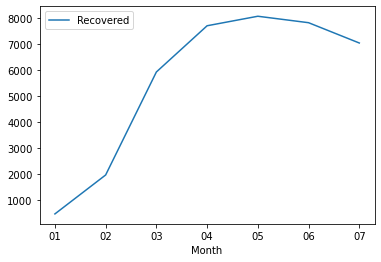

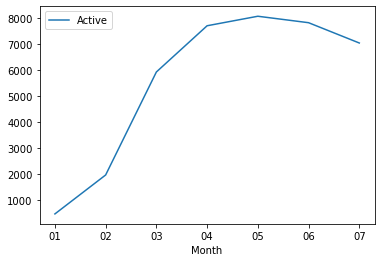

In [111]:
for i in temp:
    data.groupby('Month')[[i]].count().plot()

## Moving averages

In [113]:
df = data[temp]

In [119]:
df['Confirmed_MA'] = df['Confirmed'].rolling(10).mean()
df.dropna(inplace=True)

<ipython-input-119-b6336ae639e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Confirmed_MA'] = df['Confirmed'].rolling(10).mean()
<ipython-input-119-b6336ae639e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


<AxesSubplot:>

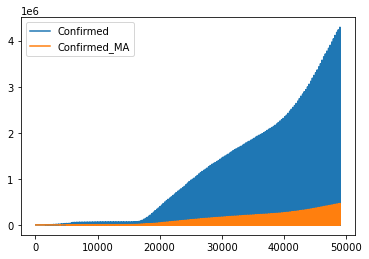

In [124]:
df[['Confirmed','Confirmed_MA']].plot()

In [120]:
df.head()

,Confirmed,Deaths,Recovered,Active,Confirmed_MA
59,5,0,0,5,6.1
61,444,17,28,399,50.4
62,4,0,0,4,49.4
64,1,0,0,1,48.9
65,2,0,0,2,49.0


# Statistics

In [63]:
#13 write a function to calculate standard deviation. (don't use builtin methods)
def std_dev(column):
    mean = np.sum(column)/len(column)
    diff = []
    for i in column:
        diff.append((i-mean)**2)
    return np.sqrt(sum(diff)/len(column))
    

In [64]:
data['Confirmed'].std()

142449.0792993026

In [65]:
std_dev(data['Confirmed'])

142447.2534387033

In [ ]:
#14 write a function to calculate pearson's r for two numerical columns.

In [ ]:
import scipy.stats as stats
stats.pearsonr(data['Confirmed'],data['length_of_service'])

In [ ]:
#15 what is central limit theorem.

#### This theorm stats that the data may follow any type of distribution but the means  of n samples of data follows normal distribution with mean of the sampled data is same as original mean and the variance of sampled data is variance of original data divided by total samples n

## Hypothesis testing

Critical Value Method

Consider this problem — H₀: μ ≤ 350 and H₁: μ > 350

In case of a two-tailed test, you find the z-score of 0.975 in the z-table, since 0.975 was cumulative probability of UCV in that case. In this problem, what would be the cumulative probability of critical point in this example for the same significance level of 5%? Type your answer below cell

In [53]:
# significance level = 5% so critical region in case of two tailed test is alpha/2 i.e 0.05/2=0.025
# so the cmmulative probability of critical point is 1-0.025 = 0.975 

Using Critical Value Method

Consider this problem, H₀: μ ≤ 350 and H₁: μ > 350

So, the Zc comes out to be 1.645. Now, find the critical value for the given Zc and make the decision to accept or reject the null hypothesis.

μ = 350     σ = 90       N (Sample size) = 36    ¯x= 370.16


In [54]:
z_score = (370.16-350)/(90/(np.sqrt(36)))
z_score

1.3440000000000016

Let’s solve the following problem on how to make a decision about any hypothesis using the p-value method.

 You are working as a data analyst at an auditing firm. A manufacturer claims that the average life of its product is 36 months. An auditor selects a sample of 49 units of the product, and calculates the average life to be 34.5 months. The population standard deviation is 4 months. Test the manufacturer’s claim at 3% significance level using the p-value method.

 First, formulate the hypotheses for this two-tailed test, which would be:

                       H₀: μ = 36 months and H₁: μ ≠ 36 months

 Now, you need to follow the three steps to find the p-value and make a decision.
 
 
STEP 1 - Calculate the value of z-score for the sample mean point on the distribution. Calculate z-score for sample mean (¯x) = 34.5 months.


STEP 2 - Calculate the p-value from the cumulative probability for the calculated z-score using the z-table.(Hint z-score of -2.62 )

 

Hint: The sample mean is on the left side of the distribution and it is a two-tailed test.

In [55]:
#step 1 
z_score = (34.5-36)/(4/(np.sqrt(49)))
z_score

-2.625

In [56]:
#step 2
# p value of cumulative probability is 0.00440